# Project: Wrangling and Analyze Data

In [1]:
# import library
import pandas as pd
import requests
import tweepy
import json
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Gathering
In the cells below, we gather **all** the three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Read the archive data

archive_data = pd.read_csv('twitter-archive-enhanced.csv')

archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Get the url and download the file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# save the downloaded file 

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
# Read the saved data

image_data = pd.read_csv('image-predictions.tsv', sep = '\t')
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Get the tweet_id from the 

# api key and api secret
customer_key = '****************'
customer_secret = '**************'

# Access token and access secret
access_token = '************************'
access_secret = '************************'

auth = tweepy.OAuthHandler(customer_key, customer_secret)
auth.set_access_token(access_token, access_secret)

# create an object

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# get the tweet_id in the archive data and store in an empty list

tweet_ids_list = []

for tweet_id in archive_data['tweet_id']:
    tweet_ids_list.append(tweet_id)
    
# confirm the number of extracted tweet_id
assert len(tweet_ids_list) == len(archive_data['tweet_id'])

In [9]:
# Query the api object and extract data

# keep track the time it will take to fetch the data
from timeit import default_timer as timer

# store the collected and failed ids in a list

collected_ids = []
failed_ids = []
start = timer()

with open('tweet_json.txt', 'w', encoding='UTF-8') as json_file:
    for tweet_id in tweet_ids_list:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, json_file)
            json_file.write('\n')
            collected_ids.append(tweet_id)
        except:
            #print('Failed collecting tweet with id ',tweet_id)
            failed_ids.append(tweet_id)
            
end = timer()
print(end - start)

Rate limit reached. Sleeping for: 741
Rate limit reached. Sleeping for: 741
1914.041630489


In [10]:
# check the number of ids collected and those that failed and output the failed ids

print('collected ids:', len(collected_ids))   
print('uncollected ids:', len(failed_ids))
print(failed_ids)

collected ids: 2327
uncollected ids: 29
[888202515573088257, 873697596434513921, 872668790621863937, 872261713294495745, 869988702071779329, 866816280283807744, 861769973181624320, 856602993587888130, 856330835276025856, 851953902622658560, 851861385021730816, 845459076796616705, 844704788403113984, 842892208864923648, 837366284874571778, 837012587749474308, 829374341691346946, 827228250799742977, 812747805718642688, 802247111496568832, 779123168116150273, 775096608509886464, 771004394259247104, 770743923962707968, 766864461642756096, 759923798737051648, 759566828574212096, 754011816964026368, 680055455951884288]


In [8]:
# Reading JSON content as pandas dataframe

api_tweet_data = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

api_tweet_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33711,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,6975,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29238,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5276,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",21982,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3466,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36813,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7197,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35195,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
# Let's extract the needed columns from the tweet dataframe

tweet_id = api_tweet_data['id']
retweet_count =api_tweet_data['retweet_count']
favorite_count = api_tweet_data['favorite_count']
create_date = api_tweet_data['created_at']

# Create a dataframe of the exrtracted information

tweet_info  =pd.DataFrame({
    'tweet_id': tweet_id,
    'retweet_count': retweet_count,
    'favorite_count': favorite_count,
    'create_date': create_date
       
})

# Display the created dataframe 

tweet_info.head()

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,6975,33711,2017-08-01 16:23:56
1,892177421306343426,5276,29238,2017-08-01 00:17:27
2,891815181378084864,3466,21982,2017-07-31 00:18:03
3,891689557279858688,7197,36813,2017-07-30 15:58:51
4,891327558926688256,7721,35195,2017-07-29 16:00:24


## Assessing Data
In this section, we will detect and document at least **eight (8) quality issues and two (2) tidiness issue**  by using **both** visual assessment and programmatic assessement to assess the data we have collected so far.

### Visual Assessment 

 - __Assessing the twitter_archive_enhanced.csv dataset__


In [10]:
archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


From the above dataset, we can see that we have 2356 rows and 17 columns. There is a tidiness issue with :
- the dog stage names (doggo, floofer, pupper, puppo) being split into multiple columns and in some rows, 
- the stage name of the dogs are missing. 
- There are some irrevelant stage names for the dog's like, "quite", "a", "an", "the". 
- This is dirty with some invalid value __8.874740e+17 and 4.196984e+09__ for the retweeted_status_id and retweeted_status_user_id.
- Data about dogs and tweet in the same dataset 

---

- __Assessing the tab separated dataset ('image-predictions.tsv')__

In [11]:
image_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


The image prediction dataset has 2-75 rows and 12 columns. The following are the issues this dataset

1. underscore in the p1 rows
2. multiples columns for labels(tidiness issue)

- __Assessing the twitter api data__

In [12]:
tweet_info

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,6975,33711,2017-08-01 16:23:56
1,892177421306343426,5276,29238,2017-08-01 00:17:27
2,891815181378084864,3466,21982,2017-07-31 00:18:03
3,891689557279858688,7197,36813,2017-07-30 15:58:51
4,891327558926688256,7721,35195,2017-07-29 16:00:24
5,891087950875897856,2589,17753,2017-07-29 00:08:17
6,890971913173991426,1649,10335,2017-07-28 16:27:12
7,890729181411237888,15689,56688,2017-07-28 00:22:40
8,890609185150312448,3605,24435,2017-07-27 16:25:51
9,890240255349198849,6074,27856,2017-07-26 15:59:51


There are 2327 rows collected.

### Programmatic Assessment 

Accessing the each dataset programmaticlly will reveal some hidden issues that cannot be detected visually.

#### 1. __Assessing the twitter_archive_enhanced.csv dataset__

In [13]:
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Since we are not interested in retweets and replies, the missing data is fine.However, there are 59 '__expanded URLs'__.  
The timestamp datatype should be datetime.

In [14]:
archive_data.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [15]:
# check the number of rating_numerator and denominator

archive_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
archive_data.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [17]:
archive_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Comment: Some rating_denominator contains values which are not 10. We will drop them in our cleaning process.



In [18]:
# check for number of dog's name

archive_data.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
the             8
Sadie           8
Toby            7
Buddy           7
an              7
Daisy           7
Bailey          7
Jack            6
Milo            6
Leo             6
Dave            6
Oscar           6
Stanley         6
Bella           6
Rusty           6
Koda            6
Scout           6
Jax             6
Alfie           5
             ... 
Hubertson       1
Alf             1
Simba           1
Superpup        1
Skittles        1
Cannon          1
Darrel          1
Mona            1
Kawhi           1
Jiminus         1
Anna            1
Ito             1
incredibly      1
Roscoe          1
Pancake         1
Dixie           1
JD              1
Bronte          1
Cilantro        1
Koko            1
Aqua            1
Julius          1
Mya             1
Mike            1
Leonidas  

In [19]:
archive_data.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

Those names that are not dog's name are in lower case. 

In [20]:
# check for duplicated tweet ids

archive_data.tweet_id.duplicated().sum()

0

No duplicate tweet_id

In [21]:
# check the numerical description

archive_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


There are outliers in the rating_numerator and denominator since the interquartile range is negative.

###### comment: - About Ouliers in numerator rating

In [22]:
# check where denominator rating is greater than 10

archive_data[archive_data.rating_denominator > 10].shape

(20, 17)

There are 20 tweet ids with denominator ratings greater than 10. 

#### 2. __Assessing the image prediction dataset__

In [23]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


No missing values in this dataset.

In [24]:
# number of first predictions that are actually not dogs

(image_data.p1_dog == False).sum()

543

In [25]:
# Number of second predictions that are not dogs

(image_data.p2_dog == False).sum()


522

In [26]:
# Number of third predictions that are not dogs

(image_data.p3_dog == False).sum()

576

In [27]:
# Count of rows where p1, p2, p3 are all false

image_data[(image_data['p1_dog']==False) & (image_data['p2_dog']==False) & (image_data['p3_dog']==False)].count()


tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [28]:
image_data[(image_data['p1_dog']==False) & (image_data['p2_dog']==False) & (image_data['p3_dog']==False)].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1217,743595368194129920,https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg,1,hippopotamus,0.505675,False,hog,0.370726,False,warthog,0.018827,False
866,697482927769255936,https://pbs.twimg.com/media/Ca31BTgWwAA4uNU.jpg,1,bath_towel,0.110587,False,Christmas_stocking,0.108573,False,weasel,0.105442,False
651,682003177596559360,https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg,1,triceratops,0.249872,False,chimpanzee,0.060929,False,mask,0.050221,False
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False


There are 324 rows where the prediction of dog's is false.

In [29]:
# check for duplicated rows

image_data.duplicated().sum()

0

No duplicate rows in the image prediction dataset.

#### 3. __Assessing the Tweet information dataset__

In [30]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
create_date       2327 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 72.8 KB


No missing values.

In [31]:
tweet_info.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2460.286205,7030.610657
std,6.820795e+16,4166.632242,10925.461633
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1220.500000
50%,7.178418e+17,1144.000000,3038.000000
75%,7.986547e+17,2846.000000,8570.000000
max,8.924206e+17,70383.000000,144340.000000


## Assessment

So far, we have seen that our data is dirty and messy. Dirty data are quality issues which includes missing, invalid and inconsistent data. Messy data includes untidiness where data have structural issues. 

For a data to be tidy, the following must be satisfied.

1. Each varibale should form a column 
2. Each observattion should form a row 
3. Each observational unit must be a table. 

From our data analysis, we will document the qulaity and tidiness issues as follow:

### Quality issues 

In the twitter_archive dataset, we have the following quality issues: 

1.  Irrelevant dog's name (e.g. "an", "a", "the", "quite")

2. Missing value for some dog's stage name

3. Some rating_denominator greater than 10

4. The timestamp datatype is not a datetime object

5. Tweet_id is an integer datatype rather than string

In the image prediction dataset, we have the following issues 

6. Some rows contains non-dogs, this occur where the prediction p1,p2, and p3 are false (324 rows)

7. Inconsistent in the title text for p1, p2, and p3 and the use of underscore

8. p1, p2, and p3 are not descriptive names

9. Unnecessary columns in all dataset

### Tidiness issues

1. In the archive_data dataset, there are multiple columns for dog stage name 

2. Data about tweet and dogs in the same dataset in the archive_data

3. The image prediction dataset contains muultiple columns for dog prediction 

## Cleaning Data
In this section, we will clean **all** of the issues we documented while assessing the data and we will merge individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result we get will be a high-quality and tidy master pandas DataFrame. 

Finally, we will join all 3 datasets into one master called twitter_archive_master. 

Our first step in the cleaning process is to address missing data, then we will address tidiness issues and finally quality issues.

In [32]:
# Copies of original pieces of data

# Twitter Archive data

df_archive_clean = archive_data.copy()

# Image prediction data

df_prediction_clean = image_data.copy()

# Tweet information data

df_tweet_clean = tweet_info.copy()


### Issue #1:

#### Define: 

Remove unnecessary column in the achive dataset. The following columns would be dropped:
- in_reply_to_status_id         
- in_reply_to_user_id 
- retweeted_status_id 
- retweeted_status_user_id 
- retweeted_status_timestamp

In [33]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Code

In [34]:
 df_archive_clean.drop(['retweeted_status_id',
 'retweeted_status_user_id',
'retweeted_status_timestamp',
'in_reply_to_status_id',
'in_reply_to_user_id'], axis=1, inplace=True)


#### Test

In [35]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue #2:

Irrelevant dog's name

#### Define  

Change all irrelevant dog's name to "None" and put Dog's name in title case.

#### Code

In [36]:
# Store non-dog's name in a variable

invalid_names  = df_archive_clean.name.str.islower()

In [37]:
df_archive_clean.name[invalid_names].value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
mad              2
getting          2
actually         2
not              2
unacceptable     1
by               1
officially       1
all              1
space            1
my               1
this             1
old              1
such             1
life             1
light            1
incredibly       1
his              1
infuriating      1
Name: name, dtype: int64

In [38]:
# Replace non-names with "None"

df_archive_clean.loc[invalid_names, 'name'] = 'None'

# Convert names to title case
df_archive_clean.name = df_archive_clean.name.str.title()

#### Test

In [39]:
# Confirm that all none dog's name are replaced

df_archive_clean.name.str.islower().value_counts()

False    2356
Name: name, dtype: int64

### Issue #3: 

Multiple columns for dog's stage's name.

#### Define

Gather dog stages (doggo, puppo, pupper, floofer) into one column named 'dog_stage'. 

#### Code

In [40]:
# Replace null data of dog stages with a blank

df_archive_clean.doggo.replace('None', '', inplace=True) 
df_archive_clean.floofer.replace('None', '', inplace=True) 
df_archive_clean.pupper.replace('None', '', inplace=True) 
df_archive_clean.puppo.replace('None', '', inplace=True) 

# Create a new column for dog_stage

df_archive_clean['dog_stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo

In [41]:
df_archive_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [42]:
# Quick test to make sure dog_stage is accurate by comparing with the old columns

df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']].sample(10)


,doggo,floofer,pupper,puppo,dog_stage
1959,,,,,
1304,,,pupper,,pupper
1316,,,,,
1630,,,,,
1175,,,,,
585,doggo,,,,doggo
960,,,,,
509,,,,,
827,,,,,
279,,,,,


In [43]:
# Capitalise all entries in the dog_stage 

df_archive_clean.dog_stage = df_archive_clean.dog_stage.str.title()

In [44]:
# Let's rename values in the dog_stage with Combined name

df_archive_clean.dog_stage.replace('Doggopupper', 'Doggo, Pupper', inplace = True)

df_archive_clean.dog_stage.replace('Doggopuppo', 'Doggo, Puppo', inplace = True)

df_archive_clean.dog_stage.replace('Doggofloofer', 'Doggo, Floofer', inplace = True)

In [45]:
# Replace empty entries with null values

df_archive_clean.dog_stage.replace('', np.nan, inplace = True)

# Replace all null values with unknown text

df_archive_clean.dog_stage = df_archive_clean.dog_stage.fillna('Unknown')

In [46]:
# check the count

df_archive_clean.dog_stage.value_counts()

Unknown           1976
Pupper             245
Doggo               83
Puppo               29
Doggo, Pupper       12
Floofer              9
Doggo, Puppo         1
Doggo, Floofer       1
Name: dog_stage, dtype: int64

In [47]:
# Drop useless columns

df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [48]:
df_archive_clean.dog_stage.sample(10)

97       Pupper
1538    Unknown
2080    Unknown
907     Unknown
1941    Unknown
65      Unknown
105     Unknown
140     Unknown
992       Doggo
1444     Pupper
Name: dog_stage, dtype: object

In [49]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stage             2356 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


### Issue #4:

Tweet_id fields in all the three dataset are stored as numeric values rather than strings.

#### Define: 

Convert all Tweet_ids in the three dataset to strings.

##### Code

In [50]:
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype('str')

df_prediction_clean.tweet_id = df_prediction_clean.tweet_id.astype('str')

df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype('str')

#### Test

In [51]:
df_archive_clean.tweet_id.dtype

dtype('O')

In [52]:
df_prediction_clean.tweet_id.dtype

dtype('O')

In [53]:
df_tweet_clean.tweet_id.dtype

dtype('O')

### Issue #5
Timestamp not in proper datatype.

#### Define
Convert all timestamp to datetime datatype and create four additional columns for year, month, day, and time. Keep the
timestamp (datetime) column for visualizations.

#### Code

In [54]:
# Convert timestamp to datetime

df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

In [55]:
# Extract datetime to new year, month, day, time columns

df_archive_clean['year'] = df_archive_clean.timestamp.dt.year

In [56]:
# Separate year, month, day, and time

df_archive_clean['month'] = df_archive_clean.timestamp.dt.month

df_archive_clean['day'] = df_archive_clean.timestamp.dt.day

df_archive_clean['time'] = df_archive_clean.timestamp.dt.time

In [57]:
# Create day of week column

df_archive_clean['weekday'] = df_archive_clean['timestamp'].dt.dayofweek

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

df_archive_clean['weekday'] = df_archive_clean['weekday'].apply(lambda x: days[x])

#### Test

In [58]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stage             2356 non-null object
year                  2356 non-null int64
month                 2356 non-null int64
day                   2356 non-null int64
time                  2356 non-null object
weekday               2356 non-null object
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 257.8+ KB


In [59]:
df_archive_clean.weekday.value_counts()

Mon      384
Tues     356
Weds     354
Fri      333
Thurs    326
Sat      309
Sun      294
Name: weekday, dtype: int64

### Issue #6

Multiple dog prediction columns in the image prediction dataset.

#### Define

Create a new column named "prediction" for the dog precition. Insert the following
- insert text 'Dog', When all three predictions are true
- insert text 'Not Dog', When all three predictions are false
- insert text 'Maybe Dog', When 1 or 2 precictions are true

#### Code



In [60]:
# convert p1_dog, p2_dog, p3_dog to an integer (True=1, False=0)

predictions_list = ['p1_dog', 'p2_dog', 'p3_dog']

for prediction in predictions_list:
    df_prediction_clean[prediction] = df_prediction_clean[prediction].astype(int)

# Create a new column that adds the total number of True and False for the three predictions

df_prediction_clean['prediction'] =  df_prediction_clean.p1_dog +  df_prediction_clean.p2_dog +  df_prediction_clean.p3_dog

# Replace the number with a defining text string

df_prediction_clean['prediction'] =  df_prediction_clean['prediction'].replace(3, 'Dog')
df_prediction_clean['prediction'] =  df_prediction_clean['prediction'].replace(2, 'Maybe Dog')
df_prediction_clean['prediction'] =  df_prediction_clean['prediction'].replace(1, 'Maybe Dog')
df_prediction_clean['prediction'] =  df_prediction_clean['prediction'].replace(0, 'Not Dog')


#### Test

In [61]:
# test the result of the ablve code

df_prediction_clean[['p1_dog', 'p2_dog', 'p3_dog','prediction']].sample(10)

,p1_dog,p2_dog,p3_dog,prediction
1892,0,0,0,Not Dog
545,1,1,1,Dog
917,1,1,1,Dog
1375,0,0,1,Maybe Dog
38,1,1,1,Dog
158,0,0,1,Maybe Dog
830,1,1,1,Dog
816,1,0,0,Maybe Dog
1824,0,1,1,Maybe Dog
1322,0,0,0,Not Dog


In [62]:
# check the value count

df_prediction_clean.prediction.value_counts()


Dog          1243
Maybe Dog     508
Not Dog       324
Name: prediction, dtype: int64

In [63]:
df_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,1,collie,0.156665,1,Shetland_sheepdog,0.061428,1,Dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,1,miniature_pinscher,0.074192,1,Rhodesian_ridgeback,0.072010,1,Dog
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,1,malinois,0.138584,1,bloodhound,0.116197,1,Dog
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,1,redbone,0.360687,1,miniature_pinscher,0.222752,1,Dog
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,1,Rottweiler,0.243682,1,Doberman,0.154629,1,Dog


In [64]:
# Drop unnecessary column like img_num, p1_dog, p2_dog, p3_dog

item_to_drop = ['img_num', 'p1_dog', 'p2_dog', 'p3_dog']

df_prediction_clean.drop(item_to_drop, axis =1, inplace = True)


In [65]:
# check the drop

df_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
p1            2075 non-null object
p1_conf       2075 non-null float64
p2            2075 non-null object
p2_conf       2075 non-null float64
p3            2075 non-null object
p3_conf       2075 non-null float64
prediction    2075 non-null object
dtypes: float64(3), object(6)
memory usage: 146.0+ KB


### Issue #7

Underscore in p1, p2, p3 columns in the image prediction dataset

#### Define

Replace all underscore in  p1, p2, p3 columns with white space.

#### Code

In [66]:
predictions = ['p1', 'p2', 'p3']

for underscore in predictions:
    df_prediction_clean[underscore] = df_prediction_clean[underscore].str.title().str.replace('_', " ") 


#### Test

In [67]:
df_prediction_clean[['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
1305,Bluetick,Crutch,Tripod
1240,Traffic Light,Fountain,Space Shuttle
1767,Golden Retriever,Labrador Retriever,Tennis Ball
822,Cocker Spaniel,Welsh Springer Spaniel,Golden Retriever
34,Chesapeake Bay Retriever,Chain Saw,Power Drill
113,Leatherback Turtle,Boxer,Terrapin
1492,Seat Belt,Golden Retriever,Labrador Retriever
1099,Rottweiler,Black-And-Tan Coonhound,American Black Bear
1299,Swing,Labrador Retriever,Eskimo Dog
670,Golden Retriever,Kuvasz,Labrador Retriever


### Issue #8

The denominator_rating have some entries greater than 10 in the df_archive_clean dataframe.

#### Define

Drop the denominator_rating since all entries should be 10 and for simplicity, rename the rating_numerator as __rating__.

#### Code

In [68]:
# Drop denominator_rating and rename numerator_rating as "rating"

df_archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)

In [69]:
# Rename

df_archive_clean.rename(columns = {'rating_numerator' : 'rating'}, inplace = True)

#### Test

In [70]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id         2356 non-null object
timestamp        2356 non-null datetime64[ns]
source           2356 non-null object
text             2356 non-null object
expanded_urls    2297 non-null object
rating           2356 non-null int64
name             2356 non-null object
dog_stage        2356 non-null object
year             2356 non-null int64
month            2356 non-null int64
day              2356 non-null int64
time             2356 non-null object
weekday          2356 non-null object
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 239.4+ KB


### Issue #9

Dog informations not in one file.

#### Define

Combine df_archive_clean and df_tweet_clean dataset via inner merge.


#### Code

In [71]:
# Joining the three datasets by taking the intersections

df_master = df_archive_clean.merge(df_tweet_clean, on = 'tweet_id', how = 'inner')\
.merge(df_prediction_clean, on = 'tweet_id', how = 'inner')

#### Test

In [72]:
# Confirm the merge result

df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 24 columns):
tweet_id          2057 non-null object
timestamp         2057 non-null datetime64[ns]
source            2057 non-null object
text              2057 non-null object
expanded_urls     2057 non-null object
rating            2057 non-null int64
name              2057 non-null object
dog_stage         2057 non-null object
year              2057 non-null int64
month             2057 non-null int64
day               2057 non-null int64
time              2057 non-null object
weekday           2057 non-null object
retweet_count     2057 non-null int64
favorite_count    2057 non-null int64
create_date       2057 non-null datetime64[ns]
jpg_url           2057 non-null object
p1                2057 non-null object
p1_conf           2057 non-null float64
p2                2057 non-null object
p2_conf           2057 non-null float64
p3                2057 non-null object
p3_conf           2057 

In [73]:
df_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,year,month,...,favorite_count,create_date,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,prediction
1308,687818504314159109,2016-01-15 02:08:05,"<a href=""http://twitter.com/download/iphone"" r...",With great pupper comes great responsibility. ...,https://twitter.com/dog_rates/status/687818504...,12,None,Pupper,2016,1,...,2279,2016-01-15 02:08:05,https://pbs.twimg.com/media/CYufR8_WQAAWCqo.jpg,Lakeland Terrier,0.873029,Soft-Coated Wheaten Terrier,0.060924,Toy Poodle,0.017031,Dog
555,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,Pinot,"Doggo, Pupper",2016,10,...,7435,2016-10-11 00:34:48,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,Porcupine,0.978042,Sea Urchin,0.006106,Echidna,0.005442,Not Dog
1017,712092745624633345,2016-03-22 01:45:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He's inverted af. Also very he...,https://twitter.com/dog_rates/status/712092745...,7,Steven,Unknown,2016,3,...,2708,2016-03-22 01:45:15,https://pbs.twimg.com/media/CeHckpuW4AAF7rT.jpg,Triceratops,0.235373,Llama,0.153126,Three-Toed Sloth,0.111840,Not Dog
944,724405726123311104,2016-04-25 01:12:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,https://twitter.com/dog_rates/status/724405726...,10,Ashleigh,Pupper,2016,4,...,4864,2016-04-25 01:12:38,https://pbs.twimg.com/media/Cg2bKLAWwAA0WEm.jpg,Golden Retriever,0.240695,Cocker Spaniel,0.202444,Feather Boa,0.159348,Maybe Dog
2021,666437273139982337,2015-11-17 02:06:42,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a lone northeastern Cumberbatch. H...,https://twitter.com/dog_rates/status/666437273...,7,None,Unknown,2015,11,...,106,2015-11-17 02:06:42,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,Chihuahua,0.671853,Beagle,0.124680,Saluki,0.044094,Dog


In [74]:
# Let check the dog prediction counts

df_master.prediction.value_counts()

Dog          1232
Maybe Dog     504
Not Dog       321
Name: prediction, dtype: int64

### Issue #10

p1, p2, and p3 are not descriptive names. Likewise p1_conf, p2_conf, p3_conf.

#### Define

Rename p1, p2 and p3 as prediction1, prediction2, and prediction3 respectively.
Also rename p1_conf, p2_conf, p3_conf as predict1_confidence, predict2_confidence, predict3_confidence.

#### Code

In [75]:
df_master = df_master.rename(columns = {
    'p1' : 'prediction1', 
    'p2' : 'prediction2',
    'p3' : 'prediction3',
    
    'p1_conf': 'predict1_confidence', 
    'p2_conf': 'predict2_confidence',
    'p3_conf': 'predict3_confidence',
})

#### Test

In [76]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 24 columns):
tweet_id               2057 non-null object
timestamp              2057 non-null datetime64[ns]
source                 2057 non-null object
text                   2057 non-null object
expanded_urls          2057 non-null object
rating                 2057 non-null int64
name                   2057 non-null object
dog_stage              2057 non-null object
year                   2057 non-null int64
month                  2057 non-null int64
day                    2057 non-null int64
time                   2057 non-null object
weekday                2057 non-null object
retweet_count          2057 non-null int64
favorite_count         2057 non-null int64
create_date            2057 non-null datetime64[ns]
jpg_url                2057 non-null object
prediction1            2057 non-null object
predict1_confidence    2057 non-null float64
prediction2            2057 non-null object
pr

### Issue #11

Some tweets are not dogs.

#### Define

Gather only entries where the prediction is Dog only.

#### Code

In [77]:
# Entries that are dog only

df_dogs = df_master[df_master['prediction'] == "Dog"]

#### Test

In [78]:
df_dogs.prediction.value_counts()

Dog    1232
Name: prediction, dtype: int64

In [79]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 1 to 2056
Data columns (total 24 columns):
tweet_id               1232 non-null object
timestamp              1232 non-null datetime64[ns]
source                 1232 non-null object
text                   1232 non-null object
expanded_urls          1232 non-null object
rating                 1232 non-null int64
name                   1232 non-null object
dog_stage              1232 non-null object
year                   1232 non-null int64
month                  1232 non-null int64
day                    1232 non-null int64
time                   1232 non-null object
weekday                1232 non-null object
retweet_count          1232 non-null int64
favorite_count         1232 non-null int64
create_date            1232 non-null datetime64[ns]
jpg_url                1232 non-null object
prediction1            1232 non-null object
predict1_confidence    1232 non-null float64
prediction2            1232 non-null object
pr

### Final Cleaning

We will drop those columns that we won't use in our analysis.

In [80]:
# Drop columns

df_master_dogs = df_dogs.drop(['month', 'day', 'time', 'prediction', 'source', 'predict1_confidence',\
             'predict2_confidence', 'prediction2', 'predict1_confidence', 'prediction3', 'predict3_confidence',\
              'expanded_urls', 'create_date'], axis=1)


In [81]:
# Confirm the drops

df_master_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 1 to 2056
Data columns (total 12 columns):
tweet_id          1232 non-null object
timestamp         1232 non-null datetime64[ns]
text              1232 non-null object
rating            1232 non-null int64
name              1232 non-null object
dog_stage         1232 non-null object
year              1232 non-null int64
weekday           1232 non-null object
retweet_count     1232 non-null int64
favorite_count    1232 non-null int64
jpg_url           1232 non-null object
prediction1       1232 non-null object
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 125.1+ KB


In [82]:
# Rearrange the columns

df_master_dogs.reindex(['tweet_id', 'prediction1', 'rating', \
                        'favorite_count', 'retweet_count', 'dog_stage', 'name', 'text',\
                        'timestamp', 'jpg_url', 'weekday', 'year'], axis=1).sample(3)

,tweet_id,prediction1,rating,favorite_count,retweet_count,dog_stage,name,text,timestamp,jpg_url,weekday,year
2009,666817836334096384,Miniature Schnauzer,9,442,209,Unknown,Jeph,This is Jeph. He is a German Boston Shuttlecoc...,2015-11-18 03:18:55,https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg,Weds,2015
86,872486979161796608,Pembroke,12,36007,7690,Unknown,None,We. Only. Rate. Dogs. Do not send in other thi...,2017-06-07 16:14:40,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,Weds,2017
377,814638523311648768,Golden Retriever,12,10668,2516,Unknown,Olivia,This is Olivia. She's a passionate advocate of...,2016-12-30 01:05:33,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,Fri,2016


## Storing Data


Here, we save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [83]:
# Make a copy 

twitter_archive_master = df_master_dogs.copy()

# Save as csv file

twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, we will analyze and visualize our wrangled data. Thereafter, we will produce **three (3) insights and one (1) visualization.**

Our interest will focus on the following:
- Most popular breed of dog
- Dog with the highest ratings
- Most favorite dog
- Most retweeted dogs
- Have tweets increased or decreased over the years?

In [84]:
# Set the text width to maximum
 
pd.set_option('display.max_colwidth', -1)

In [85]:
# Top rated dog and retweet_count

top_rated = twitter_archive_master.query('rating == 14')
top_rated.sort_values(by=['retweet_count'], ascending=False).head()

,tweet_id,timestamp,text,rating,name,dog_stage,year,weekday,retweet_count,favorite_count,jpg_url,prediction1
348,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,14,Bo,Doggo,2017,Weds,34438,82436,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,Standard Poodle
345,819015337530290176,2017-01-11 02:57:27,RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,14,Bo,Doggo,2017,Weds,34438,0,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,Standard Poodle
305,825535076884762624,2017-01-29 02:44:34,Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1,14,None,Puppo,2017,Sun,16309,53829,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,Rottweiler
324,822462944365645825,2017-01-20 15:17:01,"This is Gabe. He was the unequivocal embodiment of a dream meme, but also one h*ck of a pupper. You will be missed by so many. 14/10 RIP https://t.co/M3hZGadUuO",14,Gabe,Pupper,2017,Fri,13088,26222,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,Pomeranian
382,813812741911748608,2016-12-27 18:24:12,"Meet Gary, Carrie Fisher's dog. Idk what I can say about Gary that reflects the inspirational awesomeness that was Carrie Fisher. 14/10 RIP https://t.co/uBnQTNEeGg",14,Gary,Unknown,2016,Tues,12992,34527,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,French Bulldog


'Bo' is the most rated dog with retweet_count of 34438 and favorite_count of 82,436

In [87]:
# Top retweeted dogs

twitter_archive_master.sort_values(by=['retweet_count'], ascending=False).head()

,tweet_id,timestamp,text,rating,name,dog_stage,year,weekday,retweet_count,favorite_count,jpg_url,prediction1
871,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,13,None,Doggo,2016,Sat,52673,106857,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,Eskimo Dog
422,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13,Stephan,Unknown,2016,Fri,51458,111279,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua
319,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13,None,Puppo,2017,Sat,39793,123736,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland Terrier
59,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,13,Duddles,Unknown,2017,Mon,37293,92553,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,English Springer
345,819015337530290176,2017-01-11 02:57:27,RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,14,Bo,Doggo,2017,Weds,34438,0,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,Standard Poodle


The most retweeted dog has a bubble blowing skills with a retweeted count of 52,673.

In [88]:
 # Top favorited dogs

twitter_archive_master.sort_values(by=['favorite_count'], ascending=False).head()


,tweet_id,timestamp,text,rating,name,dog_stage,year,weekday,retweet_count,favorite_count,jpg_url,prediction1
319,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13,None,Puppo,2017,Sat,39793,123736,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland Terrier
422,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13,Stephan,Unknown,2016,Fri,51458,111279,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua
110,866450705531457537,2017-05-22 00:28:40,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",13,Jamesy,Pupper,2017,Mon,30078,108564,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French Bulldog
871,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,13,None,Doggo,2016,Sat,52673,106857,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,Eskimo Dog
59,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,13,Duddles,Unknown,2017,Mon,37293,92553,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,English Springer


The top favorite dog is a super supportive Lakeland Terrior who marches for women.


### Insights:

1. The top rated dog's name is 'Bo' with a retweet count of 3,438 and favorite count of 82,436.  
2. The most retweeted dog is an Eskimo Dog with bubble blowing skills.
3. The top favorite dog is a super supportive Lakeland Terrior who marches for women.

### Visualization

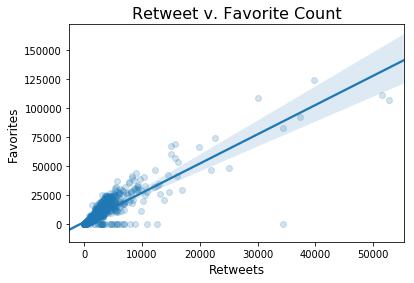

In [89]:
sns.regplot(x="retweet_count", y="favorite_count", data=twitter_archive_master, scatter_kws={'alpha':0.2})
plt.title('Retweet v. Favorite Count', size=16)
plt.xlabel('Retweets', size=12)
plt.ylabel('Favorites', size=12)
plt.savefig('retweet-favorite.png');

We have a strong positive correlation between the number of retweets and favorite count. This simply means that the the more a post is retweeted, the more viewers for it, and the more like the post receives.

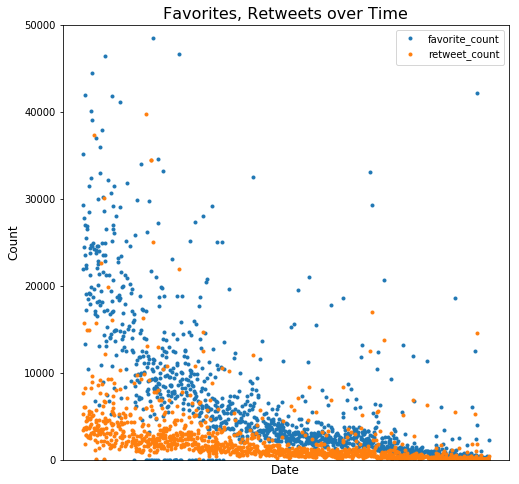

In [102]:
# Visualization of favorite and retweet_count

twitter_archive_master[['favorite_count', 'retweet_count']].plot(style = '.', ylim=[0, 50000], figsize=(8,8));
plt.title('Favorites, Retweets over Time', size=16)
plt.xlabel('Date', size=12)
plt.xticks([], [])
plt.ylabel('Count', size=12)
plt.legend(ncol=1, loc='upper right');

Clearly, favorites are more popular than retweets. Both decreases over time, while retweet fast decreases.

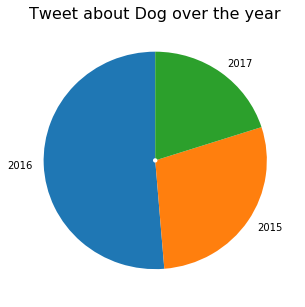

In [95]:
twitter_archive_master['year'].value_counts().plot(kind='pie', figsize=(5,5), startangle = 90, wedgeprops = {'width': 0.98})
plt.title('Tweet about Dog over the year',fontsize=16);
plt.ylabel('');

2016 accounts for the highest percentage of dog tweet over the three year period.

### References

1. WeRateDogs Twitter: https://twitter.com/dog_rates?
2. Data Tyding: https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
3. Tweepy Library: http://www.tweepy.org/ (http://www.tweepy.org/
